# Plotting with Seaborn

Some practice for plotting with seaborn using my StatsReg-Strength data

### Go to Dropbox path

In [23]:
import os
print(os.getcwd())
os.chdir("F:\\Dropbox\\Work\\Data\\behavioral\\attention\\StatisticalRegularities\\Salience\\Exp1\\beh\\analysis")
print(os.getcwd())

F:\Dropbox\Work\Data\behavioral\attention\StatisticalRegularities\Salience\Exp1\beh\analysis
F:\Dropbox\Work\Data\behavioral\attention\StatisticalRegularities\Salience\Exp1\beh\analysis


### Import data & prepare for plotting

In [24]:
import pandas as pd
data=pd.read_excel("analysisSAL1.xlsx", sheet_name=0)
data.head()

,acc,accuracy,answerQ1,answerQ2,answerQ3,average_response_time,avg_rt,background,bidi,canvas_backend,...,title,total_correct,total_response_time,total_responses,uniform_coordinates,width,Search RT > 200,previousTrial,DisDistance,location_priming
0,undefined,undefined,NaN,NaN,NaN,8386.849092,8386.849092,black,no,psycho,...,study_X,0,8386.849092,1,yes,1680,1,0,Dis-3,swap
1,undefined,undefined,NaN,NaN,NaN,8386.849092,8386.849092,black,no,psycho,...,study_X,0,8386.849092,1,yes,1680,1,0,Dis-4,swap
2,undefined,undefined,NaN,NaN,NaN,8386.849092,8386.849092,black,no,psycho,...,study_X,0,8386.849092,1,yes,1680,1,high N-1,Dis-1,swap
3,undefined,undefined,NaN,NaN,NaN,8386.849092,8386.849092,black,no,psycho,...,study_X,0,8386.849092,1,yes,1680,0,high N-1,Dis-2,swap
4,undefined,undefined,NaN,NaN,NaN,8386.849092,8386.849092,black,no,psycho,...,study_X,0,8386.849092,1,yes,1680,1,high N-1,Dis-0,swap


In [25]:
dataDis = pd.pivot_table(data[ ( data.cond_disPresent == "present") & (data["Search RT > 200"] == 1) & (data.correct == 1)],
                         values="responseTime", index="subject_nr", columns="cond_disLocation")
dataDis.head()

cond_disLocation,highProb,highProbOther,lowProb
subject_nr,,,
1,901.018699,887.546564,910.469638
2,624.201224,633.482632,675.431795
3,611.471170,615.974001,629.637109
4,812.504266,830.118105,841.104295
5,856.474157,893.741163,890.143513


In [26]:
dataDis = pd.melt( dataDis.reset_index(),id_vars="subject_nr", var_name="cond_disLocation",
                  value_vars=["highProb","highProbOther","lowProb"], value_name="responseTime")
dataDis.head()

,subject_nr,cond_disLocation,responseTime
0,1,highProb,901.018699
1,2,highProb,624.201224
2,3,highProb,611.471170
3,4,highProb,812.504266
4,5,highProb,856.474157


In [27]:
means = dataDis.groupby( ["cond_disLocation"])["responseTime"].mean().values

### Seaborn plotting

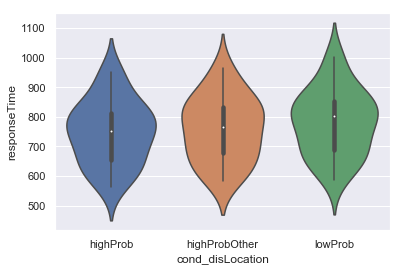

In [28]:
import seaborn as sns
sns.violinplot(x="cond_disLocation", y="responseTime", data=dataDis)

In [29]:
dataDis = pd.pivot_table(data[ ( data.cond_disPresent == "present") & (data["Search RT > 200"] == 1) & (data.correct == 1)],
                         values="responseTime", index="subject_nr", columns=["cond_disFeature", "cond_disLocation"])
dataDis.head()

cond_disFeature       color1                                color2  \
cond_disLocation    highProb highProbOther     lowProb    highProb   
subject_nr                                                           
1                 898.085754    908.953247  911.006782  903.941353   
2                 625.086246    638.712805  690.283450  623.319234   
3                 608.643340    611.815357  636.985070  614.408722   
4                 795.916730    851.552072  851.441743  829.321786   
5                 873.133619    917.033359  912.548993  840.174899   

cond_disFeature                             
cond_disLocation highProbOther     lowProb  
subject_nr                                  
1                   868.417188  909.934529  
2                   628.130827  660.637482  
3                   620.225059  622.150507  
4                   809.150095  830.727984  
5                   871.532324  867.555131

In [30]:
dataDis = pd.melt(dataDis, value_name="response time")
dataDis.head()

,cond_disFeature,cond_disLocation,response time
0,color1,highProb,898.085754
1,color1,highProb,625.086246
2,color1,highProb,608.643340
3,color1,highProb,795.916730
4,color1,highProb,873.133619


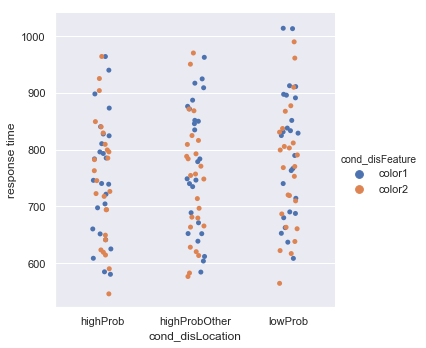

In [31]:
sns.catplot(x="cond_disLocation", y="response time", hue="cond_disFeature", data=dataDis)

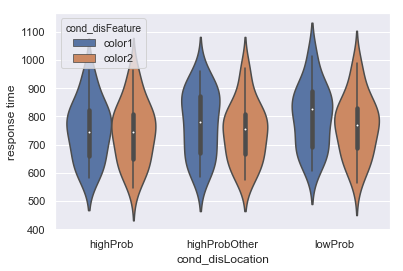

In [32]:
sns.violinplot(x="cond_disLocation", y="response time", hue="cond_disFeature", data=dataDis)

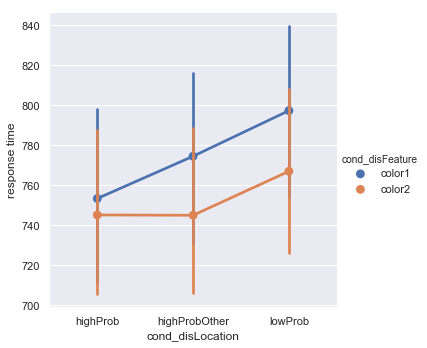

In [33]:
sns.catplot(x="cond_disLocation", y="response time", hue="cond_disFeature", kind="point",
            ci=95, units="response time", data=dataDis)

### Plot with custom error bars

If we want to use custom error bars we need to use a graph where we can access the axes.

Option 1: Stylized entire matplotlib graphs into Seaborn

Option 2: Create seaborn graph and access the axes

#### Option 1

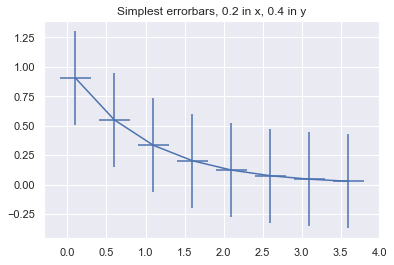

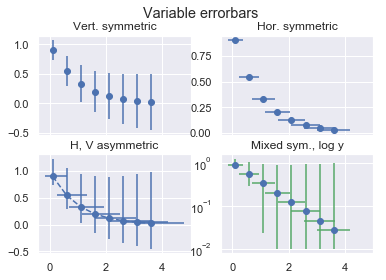

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")

# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
ax = axs[0,0]
ax.errorbar(x, y, yerr=yerr, fmt='o')
ax.set_title('Vert. symmetric')

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
ax.locator_params(nbins=4)

ax = axs[0,1]
ax.errorbar(x, y, xerr=xerr, fmt='o')
ax.set_title('Hor. symmetric')

ax = axs[1,0]
ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
ax.set_title('H, V asymmetric')

ax = axs[1,1]
ax.set_yscale('log')
# Here we have to be careful to keep all y values positive:
ylower = np.maximum(1e-2, y - yerr)
yerr_lower = y - ylower

ax.errorbar(x, y, yerr=[yerr_lower, 2*yerr], xerr=xerr,
            fmt='o', ecolor='g', capthick=2)
ax.set_title('Mixed sym., log y')

fig.suptitle('Variable errorbars')

sns.set()
plt.show()

#### Option 2

cond_disLocation  cond_disFeature
highProb          color1             107.125460
                  color2             108.741712
highProbOther     color1             113.955457
                  color2             106.494523
lowProb           color1             113.094406
                  color2             108.593162
Name: response time, dtype: float64
[6.293409172, 12.86350914, 9.765396862, 6.605023755, 11.52660614, 7.020881214]


<ErrorbarContainer object of 3 artists>

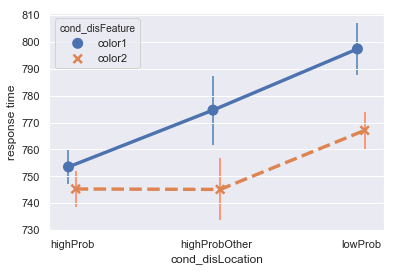

In [35]:
ax = sns.pointplot(x="cond_disLocation", y="response time", hue="cond_disFeature", markers=["o", "x"], linestyles=["-", "--"],
                   ci=None, units="response time", scale=1.25, dodge=True, join=True, data=dataDis)

# Find the x,y coordinates for each point
x_coords, y_coords = [],[]
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)
        
# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the point we're looping over
# Fancy
errors = dataDis.groupby(['cond_disLocation','cond_disFeature']).std()['response time']
print(errors)
# Plain
errorBars = [6.293409172,12.86350914,9.765396862,6.605023755,11.52660614,7.020881214]
print(errorBars)
colors = ['steelblue']*3 + ['coral']*3
ax.errorbar(x_coords, y_coords, yerr=errorBars, ecolor=colors, fmt=' ', zorder=-1)